In [1]:
import os
import shutil 

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import skimage.transform as trans
from PIL import Image, ImageEnhance 
from skimage.io import imread

from preprocess import extract, preprocess, test_train_split

import warnings
warnings.filterwarnings("ignore")

# (1) Extract from LIDC_IDRI raw dataset

In [2]:
# # 1.1: clear out old data
# shutil.rmtree('data/extracted')

In [3]:
# # 1.2: extract from raw
# extract('../raw_data/', 'data/extracted', extract_all=True)

# (2) Preprocess

In [4]:
# 2.1: clear out old data
shutil.rmtree('data/processed')

In [5]:
# 2.2 process
preprocess('data/extracted', 'data/processed')

Empty lung field returned for image 211. Skipping
Empty lung field returned for image 321. Skipping
Empty lung field returned for image 480. Skipping
Processing...596/596
Complete.


263


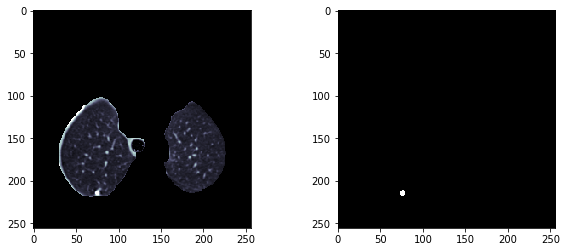

In [13]:
# 2.3: visualize

idx = np.random.randint(len(os.listdir('data/processed/image')))
# idx = 295
img = imread(f'data/processed/image/{idx}.tif') 
mask = imread(f'data/processed/label/{idx}.tif') 
print(idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(img), cmap='bone')
axs[1].imshow(np.array(mask), cmap='bone')
plt.show()


# (3) Remove bad Images

In [ ]:
bad_ims = []
for idx in os.listdir('data/processed/image'):
    im = imread(f'data/processed/image/{idx}') 
    mask = imread(f'data/processed/label/{idx}') 
    mask_pixels = im.flatten()[np.argwhere(mask.flatten()>0)]
    # remove if < 10% of mask in image
    if np.count_nonzero(mask_pixels) < (1/10)*mask_pixels.size:
        bad_ims.append(idx)

print(f"Number of bad images: {len(bad_ims)}")

# visualize bad images
bad_idx = bad_ims[np.random.randint(len(bad_ims))]
bad_img = imread(f'data/processed/image/{bad_idx}') 
bad_mask = imread(f'data/processed/label/{bad_idx}') 

print(bad_idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(bad_img), cmap='bone')
axs[1].imshow(np.array(bad_mask), cmap='bone')
plt.show()

In [8]:
for bad_im in bad_ims:
    os.remove(f'data/processed/image/{bad_im}')
    os.remove(f'data/processed/label/{bad_im}')

# (4) Split into test and train

In [9]:
# 3.1: clear out old data
shutil.rmtree('data/train')
shutil.rmtree('data/test')

In [10]:
# 3.2: split
test_train_split('data/processed', 'data/train', 'data/test')

437.tif


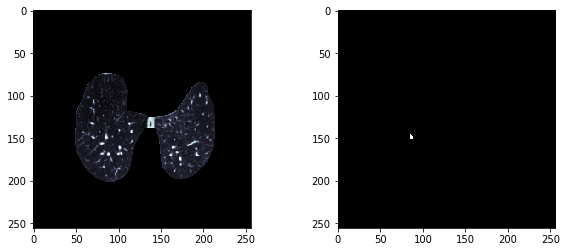

In [11]:
# 3.3a: visualize training set
train_idx = os.listdir('data/train/image')[np.random.randint(len(os.listdir('data/train/image')))]
train_img = imread(f'data/train/image/{train_idx}') 
train_mask = imread(f'data/train/label/{train_idx}') 

print(train_idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(train_img), cmap='bone')
axs[1].imshow(np.array(train_mask), cmap='bone')
plt.show()


### Test data

106.tif


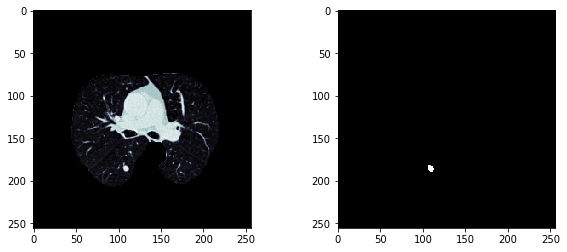

In [15]:
# 3.3b: visualize test set
test_idx = os.listdir('data/test/image')[np.random.randint(len(os.listdir('data/test/image')))]

test_img = imread(f'data/test/image/{test_idx}') 
test_mask = imread(f'data/test/label/{test_idx}') 

print(test_idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(test_img), cmap='bone')
axs[1].imshow(np.array(test_mask), cmap='bone')
plt.show()